<a href="https://colab.research.google.com/github/shravyagulaigari/Python-2/blob/main/Python_Day_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import re

ps=pd.read_csv('/content/gdrive/My Drive/CRT_PYTHON_22BK1A7248/Shopping_data.csv')


Polynomial Regression Results:
R² Score: 0.0373
RMSE: 0.1704

Random Forest Regression Results:
R² Score: -0.5458
RMSE: 0.2159



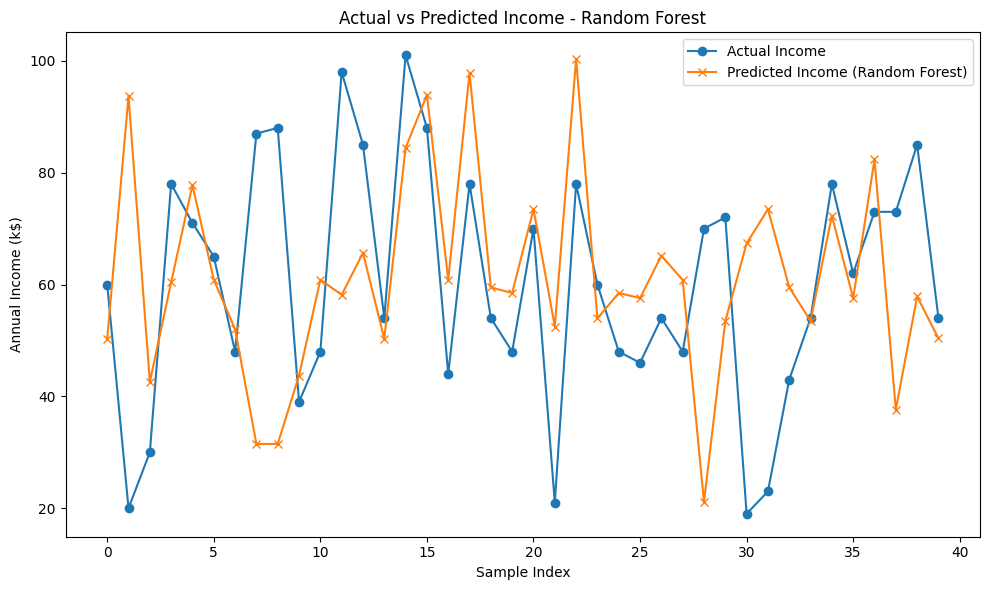

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

X = ps[['Spending Score (1-100)']]
y = ps['Annual Income (k$)']

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lin_model = LinearRegression()
lin_model.fit(X_train_poly, y_train)
y_pred_poly = lin_model.predict(X_test_poly)

r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print("Polynomial Regression Results:")
print(f"R² Score: {r2_poly:.4f}")
print(f"RMSE: {rmse_poly:.4f}\n")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.ravel())
y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest Regression Results:")
print(f"R² Score: {r2_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}\n")

y_test_orig = scaler_y.inverse_transform(y_test)
y_pred_poly_orig = scaler_y.inverse_transform(y_pred_poly)
y_pred_rf_orig = scaler_y.inverse_transform(y_pred_rf.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(y_test_orig, label="Actual Income", marker='o')
plt.plot(y_pred_rf_orig, label="Predicted Income (Random Forest)", marker='x')
plt.xlabel("Sample Index")
plt.ylabel("Annual Income (k$)")
plt.title("Actual vs Predicted Income - Random Forest")
plt.legend()
plt.tight_layout()
plt.show()